In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set_style("darkgrid")
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [202]:
ls

Company_Data.csv                     assignment2/
Fraud_check.csv                      finished assignment/
Problem_statement(Fraudcheck).txt    heatmap.png
RANDOM FOREST - COMPANY DATA.ipynb   problem statement(company data).txt
RANDOM FOREST FRAUD CHECKS.ipynb     unsubmitted assignment/


In [203]:
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# DATA EXPLORATION 

In [204]:
data.shape

(400, 11)

In [205]:
data.isnull().any()
#there is no null data in any columns

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [206]:
data.duplicated().sum()
#there is no duplicated data

0

In [207]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [208]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [209]:
print(data.ShelveLoc.value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [210]:
column_types = data.dtypes
print(column_types)

#int64 - for integer values
#float64 - for floating point values
#object - for text or mixed numeric and non-numeric values


Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


# DATA VISUALISATION

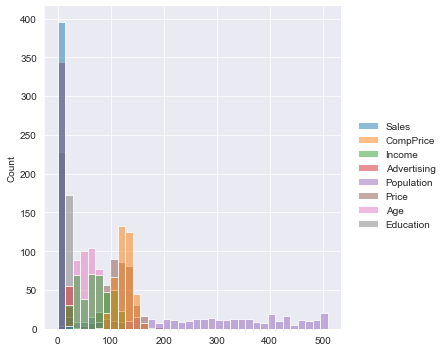

In [211]:
sns.displot(data)

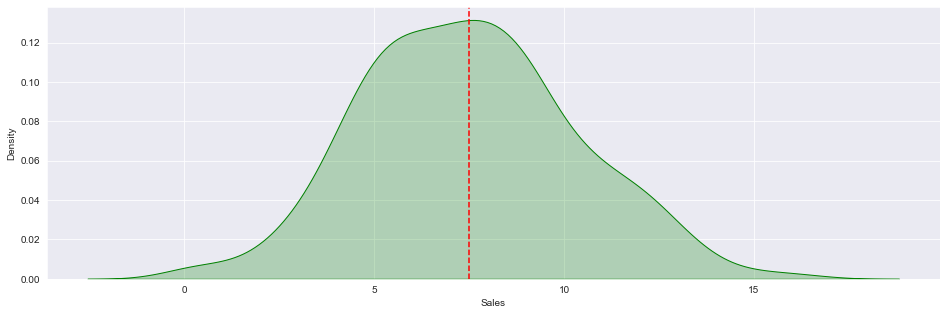

In [212]:
plt.figure(figsize=(16,5))
mean = data['Sales'].mean()
ax = sns.kdeplot(data['Sales'],shade=True,color='g')
ax.axvline(mean, color='red', linestyle='--')
plt.show()



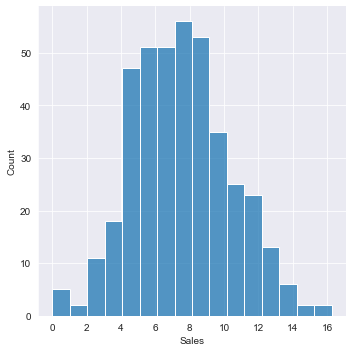

In [213]:
sns.displot(data.Sales)

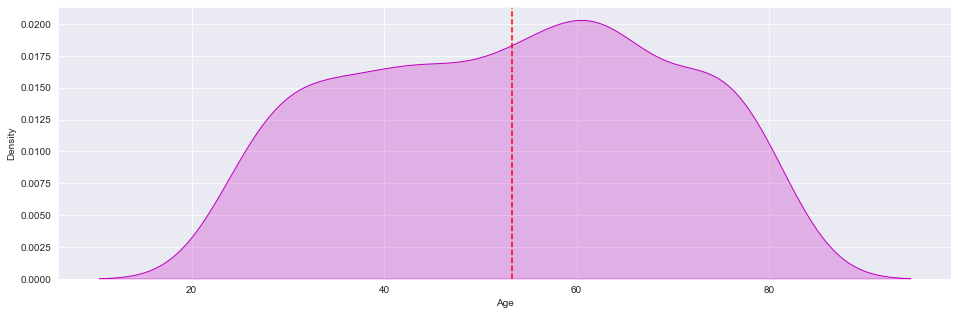

In [214]:
plt.figure(figsize=(16,5))
mean = data['Age'].mean()
ax = sns.kdeplot(data['Age'],shade=True,color='m')
ax.axvline(mean, color='red', linestyle='--')
plt.show()


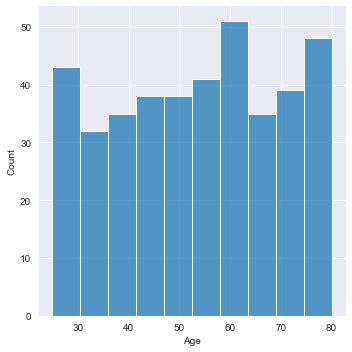

In [215]:
sns.displot(data.Age)

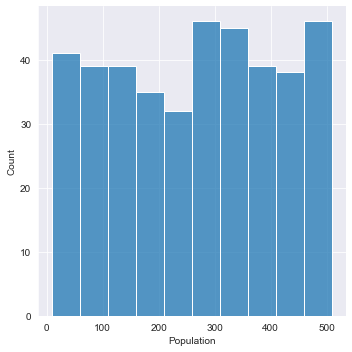

In [216]:
sns.displot(data.Population)

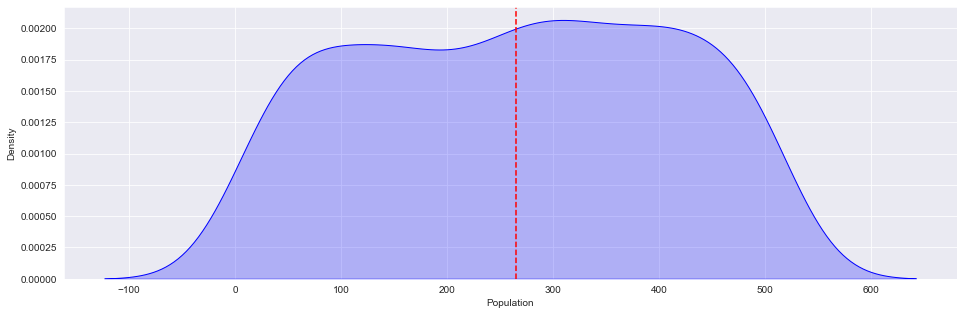

In [217]:
plt.figure(figsize=(16,5))
mean = data["Population"].mean()
ax = sns.kdeplot(data["Population"],shade=True,color='b')
ax.axvline(mean, color='red', linestyle='--')
plt.show()



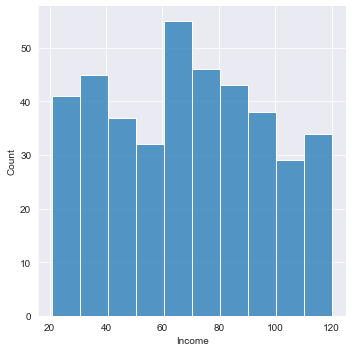

In [218]:
sns.displot(data.Income)

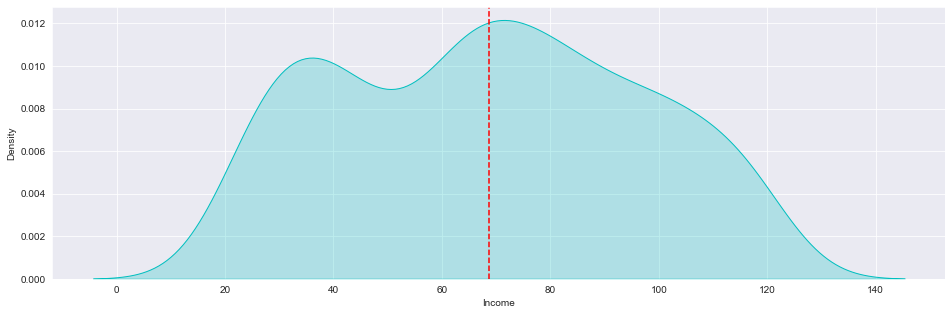

In [219]:
plt.figure(figsize=(16,5))
mean = data['Income'].mean()
ax = sns.kdeplot(data['Income'],shade=True,color='c')
ax.axvline(mean, color='red', linestyle='--')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Advertising', ylabel='Density'>

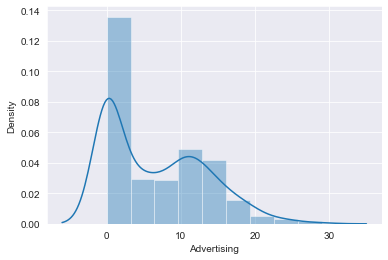

In [220]:
sns.distplot(data.Advertising)

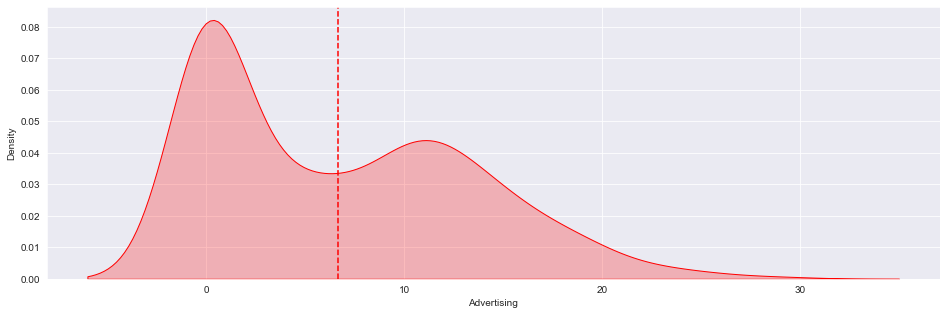

In [221]:
plt.figure(figsize=(16,5))
mean = data['Advertising'].mean()
ax = sns.kdeplot(data['Advertising'],shade=True,color='r')
ax.axvline(mean, color='red', linestyle='--')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

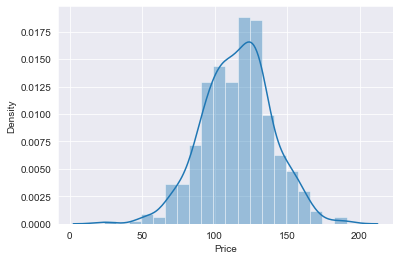

In [222]:
sns.distplot(data.Price)

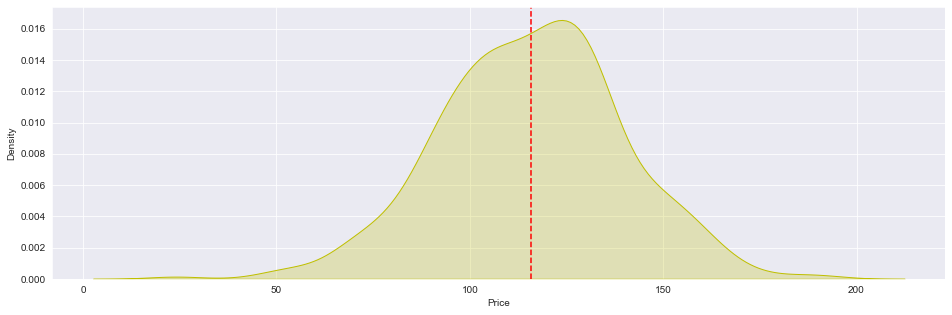

In [223]:
plt.figure(figsize=(16,5))
mean = data['Price'].mean()
ax = sns.kdeplot(data['Price'],shade=True,color='y')
ax.axvline(mean, color='red', linestyle='--')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

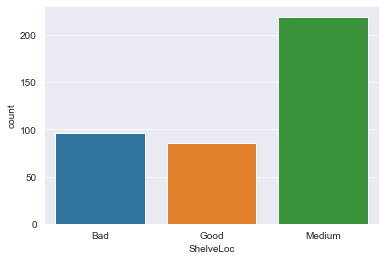

In [224]:
sns.countplot(data.ShelveLoc)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

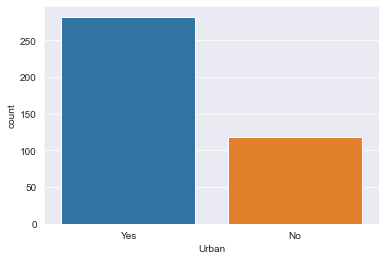

In [225]:
sns.countplot(data.Urban)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='US', ylabel='count'>

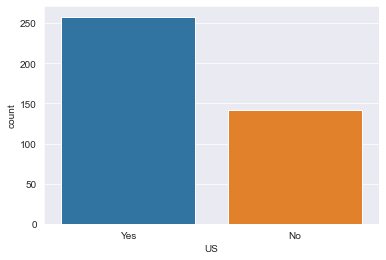

In [226]:
sns.countplot(data.US)

<AxesSubplot:>

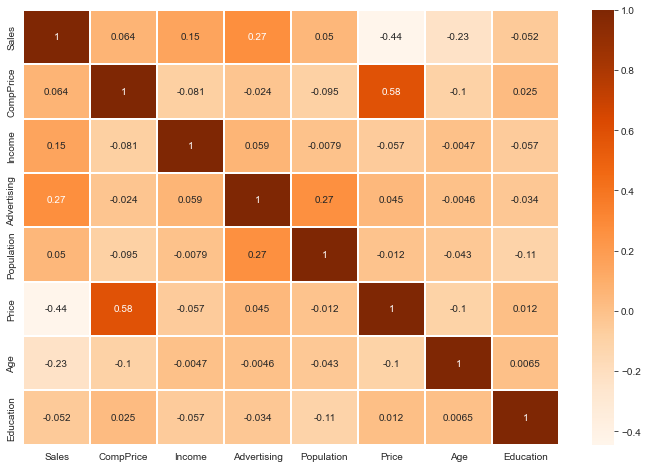

In [227]:
plt.figure(figsize=[12,8])
sns.heatmap(data.corr(),annot=True,linewidths=0.01,cmap='Oranges')

Text(0.5, 1.0, 'Education')

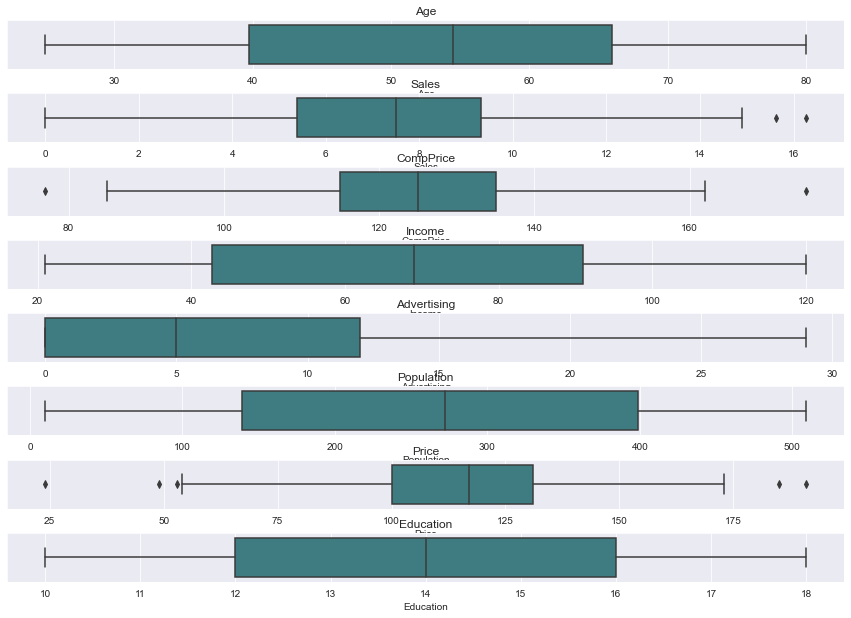

In [228]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15, 10))
ot=data.copy()
fig.subplots_adjust(hspace=0.5, bottom=0.1)

sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[0])
axes[0].set_title('Age')
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[1])
axes[1].set_title('Sales')
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[2])
axes[2].set_title('CompPrice')
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[3])
axes[3].set_title('Income')
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[4])
axes[4].set_title('Advertising')
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[5])
axes[5].set_title('Population')
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[6])
axes[6].set_title('Price')
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
axes[7].set_title('Education')

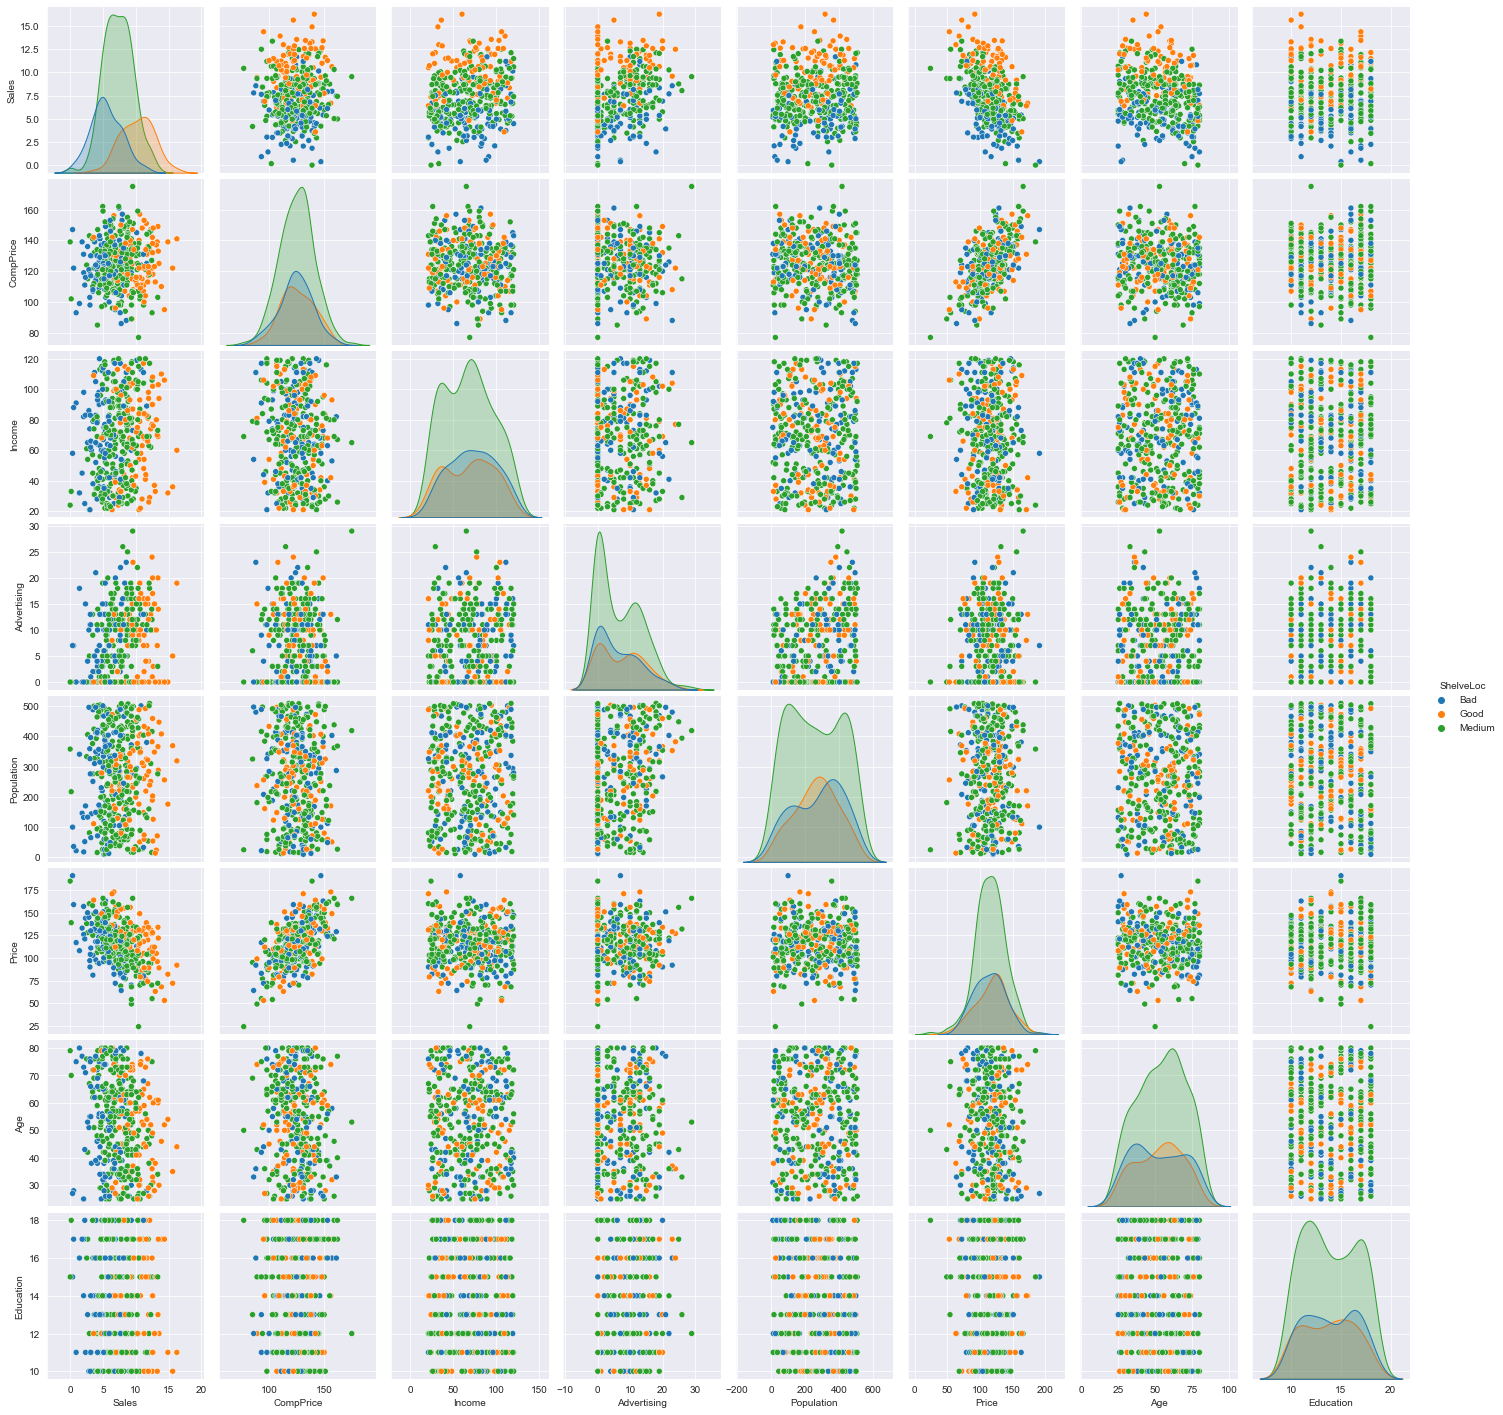

In [229]:
sns.pairplot(data=data, hue= "ShelveLoc")

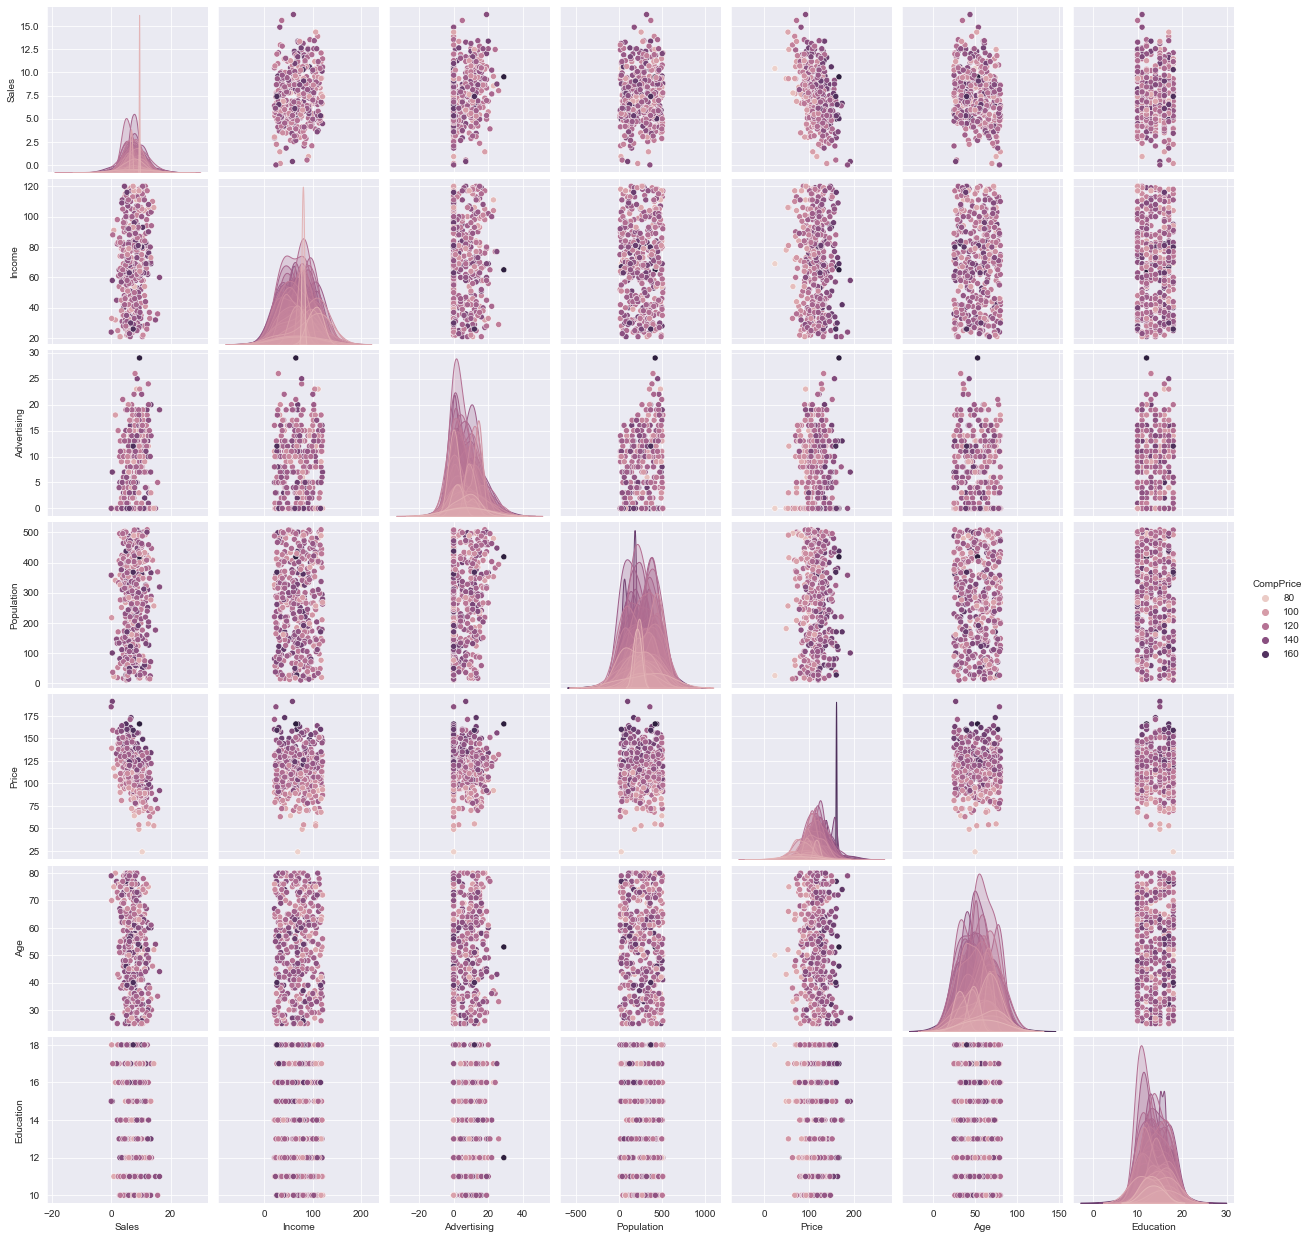

In [230]:
sns.pairplot(data=data, hue= "CompPrice")

In [232]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
data1 = encoder.fit_transform(data)

In [233]:
data1.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
65,4.90,122,26,0,197,128,3,55,13,2,2
394,5.35,130,58,19,366,139,1,33,16,1,1
369,10.26,135,100,22,463,122,3,36,14,1,1
175,7.54,115,89,0,38,122,3,25,12,1,2
336,5.17,138,35,6,60,143,1,28,18,1,2


In [234]:
#split data into x and y 
x = data1.drop(['Sales'], axis =1)
y = data1['Sales']

In [235]:
y= pd.cut(data.Sales, bins=[-1, 10, 17], labels=[0,1])
y

0      0
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    0
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [236]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2


In [237]:
pd.DataFrame(y)

,Sales
0,0
1,1
2,1
3,0
4,0
...,...
395,1
396,0
397,0
398,0


In [238]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [239]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
157,121,58,8,249,90,3,48,13,2,1
109,115,65,0,217,90,3,60,17,2,2
17,147,74,13,251,131,2,52,10,1,1
347,96,39,0,161,112,2,27,14,2,2
24,145,119,16,294,113,1,42,12,1,1
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,3,58,17,2,1
106,102,33,0,217,139,3,70,18,2,2
270,119,26,0,284,89,2,26,10,1,2
348,132,102,20,459,107,2,49,11,1,1


In [240]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,98,21,11,326,90,1,76,11,2,1
280,121,86,10,496,145,1,51,10,1,1
33,114,38,13,317,128,2,50,16,1,1
210,125,41,2,357,123,1,47,14,2,1
93,145,30,0,67,104,3,55,17,1,2
...,...,...,...,...,...,...,...,...,...,...
60,122,102,19,469,123,1,29,13,1,1
79,134,67,0,286,90,1,41,13,1,2
285,146,26,11,261,131,3,39,10,1,1
305,115,29,26,394,132,3,33,13,1,1


In [241]:
y_train

157    1
109    0
17     1
347    0
24     1
      ..
71     0
106    0
270    1
348    1
102    0
Name: Sales, Length: 280, dtype: category
Categories (2, int64): [0 < 1]

In [242]:
y_test

209    0
280    0
33     0
210    0
93     0
      ..
60     0
79     0
285    0
305    0
281    1
Name: Sales, Length: 120, dtype: category
Categories (2, int64): [0 < 1]

# APPLICATION OF RANDOM FOREST TO DATA

In [243]:
model = RandomForestClassifier(n_estimators=150,random_state=42,oob_score =True,max_features=0.9)
model.fit(x_train, y_train)
model.oob_score_

0.8178571428571428

In [244]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.85

In [245]:
#accuracy score of test variable
accuracy_score(y_test,y_pred)

0.85

In [246]:
data_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_pred

,Actual,Predicted
209,0,0
280,0,0
33,0,0
210,0,0
93,0,0
...,...,...
60,0,1
79,0,0
285,0,0
305,0,0


In [248]:
confusion_matrix(y_test,y_pred)

array([[90,  6],
       [12, 12]])

In [252]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        96
           1       0.67      0.50      0.57        24

    accuracy                           0.85       120
   macro avg       0.77      0.72      0.74       120
weighted avg       0.84      0.85      0.84       120



In [253]:
model.feature_importances_

array([0.11410549, 0.09841856, 0.16626948, 0.07335926, 0.23588617,
       0.09032833, 0.14604171, 0.0501409 , 0.01328484, 0.01216524])

In [254]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending =False)
fi

,feature,importance
4,Price,0.235886
2,Advertising,0.166269
6,Age,0.146042
0,CompPrice,0.114105
1,Income,0.098419
5,ShelveLoc,0.090328
3,Population,0.073359
7,Education,0.050141
8,Urban,0.013285
9,US,0.012165


# APPLICATION OF  RANDOM FOREST REGRESSSOR 

In [255]:
model1= RandomForestRegressor()
model1.fit(x_train, y_train)


RandomForestRegressor()

In [256]:
y_pred1 = model.predict(x_test)
model.score(x_test, y_test)

0.85

In [257]:
confusion_matrix(y_test, y_pred1)

array([[90,  6],
       [12, 12]])

In [258]:
data_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred1})
data_pred

,Actual,Predicted
209,0,0
280,0,0
33,0,0
210,0,0
93,0,0
...,...,...
60,0,1
79,0,0
285,0,0
305,0,0


In [259]:
model1.feature_importances_

array([0.12396348, 0.09498301, 0.16295113, 0.08343613, 0.2375437 ,
       0.09420923, 0.12852576, 0.05322791, 0.01012793, 0.01103172])

In [260]:
fi1 = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending =False)
fi1

,feature,importance
4,Price,0.235886
2,Advertising,0.166269
6,Age,0.146042
0,CompPrice,0.114105
1,Income,0.098419
5,ShelveLoc,0.090328
3,Population,0.073359
7,Education,0.050141
8,Urban,0.013285
9,US,0.012165
